# Урок 1. Алгоритм линейной регрессии. Градиентный спуск. 
# Практическая часть

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

### Ручной подбор коэффициентов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

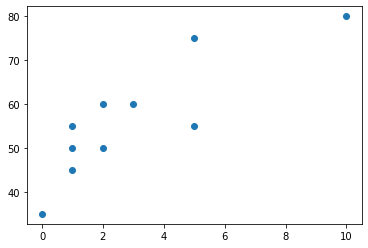

In [5]:
plt.scatter(X[:, 1], y);

Уравнение прямой: $y = a*x + b$

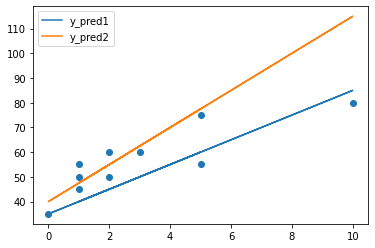

In [16]:
y_pred1 = 5 * X[:, 1] + 35 * X[:, 0] 
y_pred2 = 7.5 * X[:, 1] + 40 * X[:, 0]

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='y_pred1')
plt.plot(X[:, 1], y_pred2, label='y_pred2')
plt.legend()
plt.show()

Отклонение

In [18]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65, -60.0)

MAE (Mean Absolute Error)

In [19]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [20]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

### Метод наименьших квадратов (МНК)

$$w = (X^{T}X)^{-1}X^{T}y.$$


In [21]:
# вычисляем векторы высов
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [59]:
# умножаем на признаки - стаж репетитора и свободный коэффициент, вычисляем предсказанный результат
y_pred_analytical = W_analytical[0] * X[:, 0] + W_analytical[1] * X[:, 1]
y_pred_analytical = X @ W_analytical
y_pred_analytical

array([48.875 , 48.875 , 52.6875, 64.125 , 56.5   , 45.0625, 64.125 ,
       83.1875, 48.875 , 52.6875])

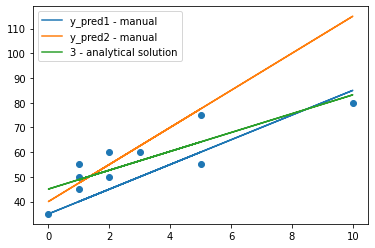

In [24]:
# сравниваем со значениями, полученными подбором вручную
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='y_pred1 - manual')
plt.plot(X[:, 1], y_pred2, label='y_pred2 - manual')
plt.plot(X[:, 1], y_pred_analytical, label='3 - analytical solution')
plt.legend()
plt.show()

In [39]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [40]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [27]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [28]:
calc_mae(y, y_pred_analytical), calc_mse(y, y_pred_analytical)

(5.7875, 43.96875000000001)

### Градиентный спуск

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


In [46]:
# инициализируем веса случайными значениями
W = np.random.normal(size=(X.shape[1]))
W

array([1.01209233, 1.01138106])

In [47]:
eta = 0.02 # величина шага обучения

In [48]:
# массив аргументов + массив коэфициентов
X.shape,  W.shape

((10, 2), (2,))

In [49]:
n = len(y) # количество объектов балл - стаж

dQ = 2/n * X.T @ (X @ W - y) # градиент функции ошибки
dQ

array([-104.90752901, -359.54049015])

In [50]:
grad = eta * dQ
grad

array([-2.09815058, -7.1908098 ])

In [51]:
print(f'previous weights', W)
W = W - grad
print(f'new weights', W)

previous weights [1.01209233 1.01138106]
new weights [3.11024291 8.20219086]


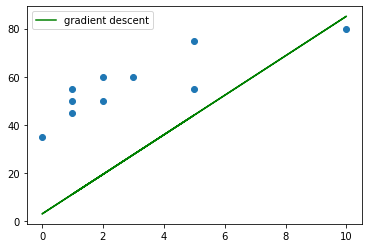

In [52]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

### Домашнее задание <a class="anchor" id="hw"></a><center>

#### 1. Подберите скорость обучения (eta) и количество итераций

In [144]:
n = X.shape[0]

eta = 0.08 #шаг обучения
n_iter = 150 #число шагов итерации

W = np.array([1, 0.5]) #задаем определенные веса
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W) # вычисление скалярного роизведения массивов исходых данных и весов - получаем число
    err = calc_mse(y, y_pred) # вычисляем среднеквадратичную ошибку
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.08        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 9.64 30.66], MSE = 3047.75
Iteration #10: W_new = [ 315.8839303  1609.16289942], MSE = 19306059.14
Iteration #20: W_new = [ 4694.58238137 25704.43006749], MSE = 6869748656.66
Iteration #30: W_new = [13148.81063651 72300.8099766 ], MSE = 77013431098.37
Iteration #40: W_new = [ 5568.02477153 30481.61516525], MSE = 20005808124.66
Iteration #50: W_new = [ 325.97624288 1565.85317301], MSE = 80059962.48
Iteration #60: W_new = [44.89389307 11.35036709], MSE = 2847.14
Iteration #70: W_new = [44.04784454  3.99855515], MSE = 44.49
Iteration #80: W_new = [44.34456924  3.94268569], MSE = 44.23
Iteration #90: W_new = [44.538199   3.9075739], MSE = 44.11
Iteration #100: W_new = [44.66834514  3.88397391], MSE = 44.05
Iteration #110: W_new = [44.75829579  3.86766274], MSE = 44.01
Iteration #120: W_new = [44.82205694  3.85610064], MSE = 44.0
Iteration #130: W_new = [44.86830151  3.8477149 ]

#### 2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [189]:
n = X.shape[0]

eta = 0.04 
n_iter = 150

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ - чтобы не было ошибки при вычислении скалярного произведения - транспонируем массив признаков - приводя к размерности 2
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    if i % 10 == 0:
                print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 5.32 15.58], MSE = 3047.75
Iteration #10: W_new = [17.10326214  8.88299874], MSE = 440.56
Iteration #20: W_new = [25.78123866  7.30885952], MSE = 232.58
Iteration #30: W_new = [31.76579204  6.22365298], MSE = 133.67
Iteration #40: W_new = [35.89284874  5.47527488], MSE = 86.63
Iteration #50: W_new = [38.73894198  4.95917975], MSE = 64.26
Iteration #60: W_new = [40.70165956  4.60327118], MSE = 53.62
Iteration #70: W_new = [42.05518524  4.35783016], MSE = 48.56
Iteration #80: W_new = [42.98860113  4.18856958], MSE = 46.15
Iteration #90: W_new = [43.63230168  4.07184441], MSE = 45.01
Iteration #100: W_new = [44.07620927  3.99134862], MSE = 44.46
Iteration #110: W_new = [44.382336    3.93583725], MSE = 44.2
Iteration #120: W_new = [44.59344656  3.89755561], MSE = 44.08
Iteration #130: W_new = [44.73903223  3.87115589], MSE = 44.02
Iteration #140: W_new = [44.83943075  3.8529501

#### 3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [270]:
n = X.shape[0]
i = 0 # обнуляем счетчик итераций 
eta = 0.04 
# вместо количества итераций добавляем минимальное значение изменения весов, при котором цикл останавливается 
# для простоты используем суммарное изменение весов но можно сделать и по отдельности
# также используем верхнее ограничение по кол-ву циклов - 200
epsilon = 0.007

e_current = 0 # текущее значение суммы весов текущего цикла
e_last = 0 # значение суммы весов прошлого цикла
e_delta = epsilon + 1 #абсолютная разница между предидущей и текущей суммой весом - начальное значение задаем 
# на единицу больше чем epsilon чтобы запустить цикл (понимаю что костыль)

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

while True: 
    if i > 200 or e_delta < epsilon:
        break
    i += 1   
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    e_last = e 
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    e = sum(W)
    e_delta = abs((e-e_last))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, delta = {e_delta-epsilon}, MSE = {round(err,2)}') 

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [16.0443793   9.07319509], delta = 0.887273949058757, MSE = 471.16
Iteration #20: W_new = [25.05123363  7.44123447], delta = 0.613256035813636, MSE = 247.13
Iteration #30: W_new = [31.26236734  6.31494128], delta = 0.420740231741474, MSE = 140.59
Iteration #40: W_new = [35.54567792  5.53822895], delta = 0.287977431228709, MSE = 89.92
Iteration #50: W_new = [38.49952668  5.00259402], delta = 0.19642179309700014, MSE = 65.82
Iteration #60: W_new = [40.53655442  4.63321045], delta = 0.13328336247431383, MSE = 54.36
Iteration #70: W_new = [41.94132574  4.37847683], delta = 0.08974195418046593, MSE = 48.91
Iteration #80: W_new = [42.91008155  4.2028079 ], delta = 0.05971500834869448, MSE = 46.32
Iteration #90: W_new = [43.57815315  4.08166341], delta = 0.03900788124109556, MSE = 45.09
Iteration #100: W_new = [44.03886746  3.99811998], delta = 0.024727870365102718, MSE = 44.5
Iter